In [32]:
from fuzzy import *

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [33]:
# Range of ages (from 18 to 75 years old)
age_universe_discourse = np.arange(18, 76, 1)

# Range of vehicle usage (from 0% to 100%)
vehicle_usage_universe_discourse = np.arange(0, 101, 1)

# Range of financial risk (from 0% to 100%)
financial_risk_universe_discourse = np.arange(0, 101, 1)

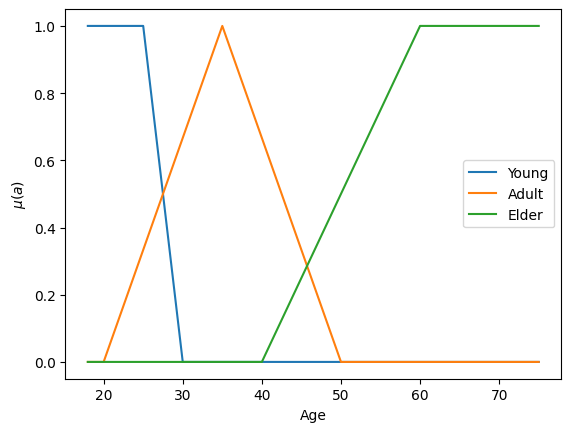

In [34]:
# Membership function for age
age_membership_young = trapmf(age_universe_discourse, [18, 18, 25, 30])
age_membership_adult = trimf(age_universe_discourse, [20, 35, 50])
age_membership_elder = trapmf(age_universe_discourse, [40, 60, 75, 75])

# Graphs for age
plt.plot(age_universe_discourse, age_membership_young, label="Young")
plt.plot(age_universe_discourse, age_membership_adult, label="Adult")
plt.plot(age_universe_discourse, age_membership_elder, label="Elder")
plt.legend(loc='best')
plt.xlabel('Age')
plt.ylabel('$\mu (a)$')
plt.show()

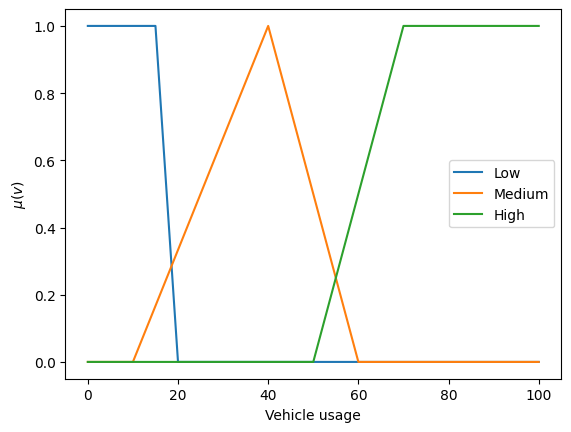

In [35]:
# Membership function for vehicle usage
vehicle_usage_membership_low = trapmf(vehicle_usage_universe_discourse, [0, 0, 15, 20])
vehicle_usage_membership_medium = trimf(vehicle_usage_universe_discourse, [10, 40, 60])
vehicle_usage_membership_high = trapmf(vehicle_usage_universe_discourse, [50, 70, 100, 100])

# Graphs for vehicle usage
plt.plot(vehicle_usage_universe_discourse, vehicle_usage_membership_low, label="Low")
plt.plot(vehicle_usage_universe_discourse, vehicle_usage_membership_medium, label="Medium")
plt.plot(vehicle_usage_universe_discourse, vehicle_usage_membership_high, label="High")
plt.legend(loc='best')
plt.xlabel('Vehicle usage')
plt.ylabel('$\mu (v)$')
plt.show()

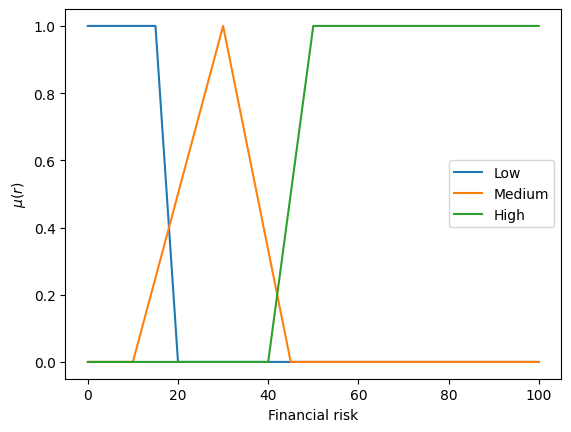

In [36]:
# Membership function for financial risk
financial_risk_membership_low = trapmf(financial_risk_universe_discourse, [0, 0, 15, 20])
financial_risk_membership_medium = trimf(financial_risk_universe_discourse, [10, 30, 45])
financial_risk_membership_high = trapmf(financial_risk_universe_discourse, [40, 50, 100, 100])

# Graphs financial risk
plt.plot(financial_risk_universe_discourse, financial_risk_membership_low, label="Low")
plt.plot(financial_risk_universe_discourse, financial_risk_membership_medium, label="Medium")
plt.plot(financial_risk_universe_discourse, financial_risk_membership_high, label="High")
plt.legend(loc='best')
plt.xlabel('Financial risk')
plt.ylabel('$\mu (r)$')
plt.show()

In [37]:
# Define values for the exercise scenario
# Person with 25 years of age and a 50% usage of the vehicle
age_value = 25
vehicle_usage_value = 50

Young age: 1.0
Adult age: 0.3333333333333333
Elder age 0.0


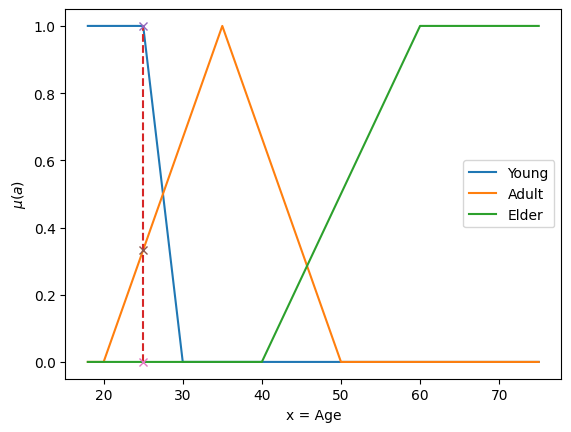

In [38]:
# Calculate the grade of membership for the given value of the variable 'age'
age_value_grade_membership_young = fuzz.interp_membership(age_universe_discourse, age_membership_young, age_value)
age_value_grade_membership_adult = fuzz.interp_membership(age_universe_discourse, age_membership_adult, age_value)
age_value_grade_membership_elder = fuzz.interp_membership(age_universe_discourse, age_membership_elder, age_value)

print("Young age:", age_value_grade_membership_young)
print("Adult age:", age_value_grade_membership_adult)
print("Elder age", age_value_grade_membership_elder)

plt.plot(age_universe_discourse, age_membership_young, label="Young")
plt.plot(age_universe_discourse, age_membership_adult, label="Adult")
plt.plot(age_universe_discourse, age_membership_elder, label="Elder")
plt.plot([age_value, age_value], [0.0, 1.0], linestyle="--")
plt.plot(age_value, age_value_grade_membership_young, 'x')
plt.plot(age_value, age_value_grade_membership_adult, 'x')
plt.plot(age_value, age_value_grade_membership_elder, 'x')
plt.legend(loc='best')
plt.xlabel('x = Age')
plt.ylabel('$\mu (a)$')
plt.show()

Low vehicle usage: 0.0
Medium vehicle usage: 0.5
High vehicle usage 0.0


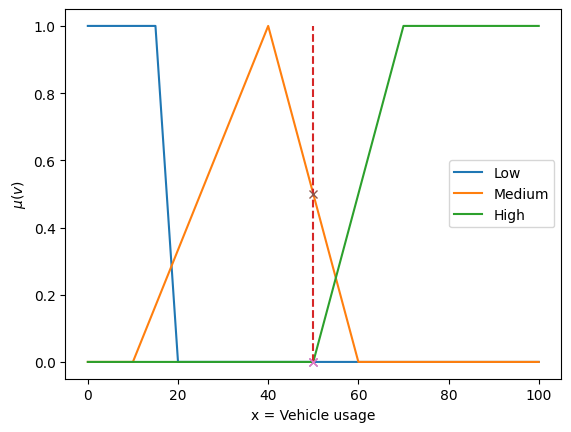

In [39]:
# Calculate the grade of membership for the given value of the variable 'vehicle usage'
vehicle_usage_value_grade_membership_low = fuzz.interp_membership(vehicle_usage_universe_discourse,
                                                                  vehicle_usage_membership_low,
                                                                  vehicle_usage_value)

vehicle_usage_value_grade_membership_medium = fuzz.interp_membership(vehicle_usage_universe_discourse,
                                                                     vehicle_usage_membership_medium,
                                                                     vehicle_usage_value)

vehicle_usage_value_grade_membership_high = fuzz.interp_membership(vehicle_usage_universe_discourse,
                                                                   vehicle_usage_membership_high,
                                                                   vehicle_usage_value)

print("Low vehicle usage:", vehicle_usage_value_grade_membership_low)
print("Medium vehicle usage:", vehicle_usage_value_grade_membership_medium)
print("High vehicle usage", vehicle_usage_value_grade_membership_high)

plt.plot(vehicle_usage_universe_discourse, vehicle_usage_membership_low, label="Low")
plt.plot(vehicle_usage_universe_discourse, vehicle_usage_membership_medium, label="Medium")
plt.plot(vehicle_usage_universe_discourse, vehicle_usage_membership_high, label="High")
plt.plot([vehicle_usage_value, vehicle_usage_value], [0.0, 1.0], linestyle="--")
plt.plot(vehicle_usage_value, vehicle_usage_value_grade_membership_low, 'x')
plt.plot(vehicle_usage_value, vehicle_usage_value_grade_membership_medium, 'x')
plt.plot(vehicle_usage_value, vehicle_usage_value_grade_membership_high, 'x')
plt.legend(loc='best')
plt.xlabel('x = Vehicle usage')
plt.ylabel('$\mu (v)$')
plt.show()

In [40]:
# Fuzzify and defuzzify

In [41]:
# RULE 1: "IF the age is young AND the vehicle usage is medium THEN the financial risk is high"
antecedent_1 = np.fmin(age_value_grade_membership_young, vehicle_usage_value_grade_membership_medium)
rule_1 = np.fmin(antecedent_1, financial_risk_membership_high)

In [42]:
# RULE 2: "IF the age is adult AND the vehicle usage is medium THEN the financial risk is medium"
antecedent_2 = np.fmin(age_value_grade_membership_adult, vehicle_usage_value_grade_membership_medium)
rule_2 = np.fmin(antecedent_2, financial_risk_membership_medium)

In [43]:
# Union of the resulting group given the application of the rules
union = np.fmax(rule_1, rule_2)
print(union)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05
 0.1        0.15       0.2        0.25       0.3        0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.26666667
 0.2        0.3        0.4        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5 

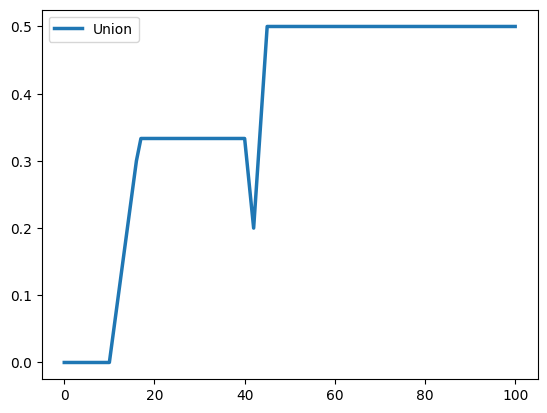

In [44]:
# Graphical representation of the give rule's union
plt.plot(financial_risk_universe_discourse, union, linewidth=2.5, linestyle="-", label="Union")
plt.legend(loc='best')
plt.show()

In [45]:
# Apply defusification given different methods in order to obtain the percent of the financial risk
defuzz_centroid = defuzz(financial_risk_universe_discourse, union, 'centroid')
defuzz_bisector = defuzz(financial_risk_universe_discourse, union, 'bisector')
defuzz_mom = defuzz(financial_risk_universe_discourse, union, 'MOM')
defuzz_som = defuzz(financial_risk_universe_discourse, union, 'SOM')
defuzz_lom = defuzz(financial_risk_universe_discourse, union, 'LOM')

print(f"Defuzzification with the 'Centroid' method = {defuzz_centroid}%")
print(f"Defuzzification with the 'Bisector' method = {defuzz_bisector}%")
print(f"Defuzzification with the 'MOM' method = {defuzz_mom}%")
print(f"Defuzzification with the 'SOM' method = {defuzz_som}%")
print(f"Defuzzification with the 'LOM' method = {defuzz_lom}%")

Defuzzification with the 'Centroid' method = 60.78194505015263%
Defuzzification with the 'Bisector' method = 62%
Defuzzification with the 'MOM' method = 72.5%
Defuzzification with the 'SOM' method = 45%
Defuzzification with the 'LOM' method = 100%


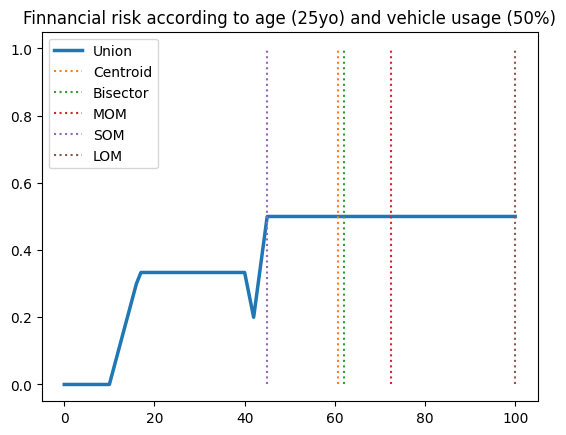

In [46]:
# Graph representation to compare what is the result of applying each method
plt.plot(financial_risk_universe_discourse, union, linewidth=2.5, linestyle="-", label="Union")
plt.plot([defuzz_centroid, defuzz_centroid], [0, 1], linestyle=":", label="Centroid")
plt.plot([defuzz_bisector, defuzz_bisector], [0, 1], linestyle=":", label="Bisector")
plt.plot([defuzz_mom, defuzz_mom], [0, 1], linestyle=":", label="MOM")
plt.plot([defuzz_som, defuzz_som], [0, 1], linestyle=":", label="SOM")
plt.plot([defuzz_lom, defuzz_lom], [0, 1], linestyle=":", label="LOM")
plt.title(f"Finnancial risk according to age ({age_value}yo) and vehicle usage ({vehicle_usage_value}%)")
plt.legend(loc='best')
plt.show()

Result and conclusion